<a href="https://colab.research.google.com/github/Mi-Lai/Machine-Learning/blob/main/Proyecto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Equipo 27**

*Analistas:*

♥ Mi-Lai Yamamoto Joo

♥ Litzi Vianey Acosta Reyes

♥Tania Rosales Onofre

♥Joselyn Guerrero Cabrera

♥ Dafne Linette Badillo Campuzano


#INTRODUCCIÓN
El presente proyecto es una comparación de los algritmos supervisados y no supervisados para la detección de Fraude de Tarjetas de Crédito usando datos extraidos de Kanggle: Credit Card Fraud by DHANUSH NARAYANAN R., con la finalidad de obsevar cual modelo se ajusta mejor a nuestros datos.

**Importamos librerias y datos**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances


In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
URL="https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data"
od.download(URL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: milaiyamamoto
Your Kaggle Key: ··········


100%|██████████| 28.9M/28.9M [00:00<00:00, 47.6MB/s]


Primero importamos nustro dataset y limpiamos los datos.

In [ ]:
import os
os.chdir("./credit-card-fraud")
os.listdir()

['card_transdata.csv']

In [ ]:
import pandas as pd
data='card_transdata.csv'
df=pd.read_csv(data)

***Explicación de las  características:***

**Distance_from_home:** la distancia desde el hogar donde se realizó la transacción.

**Distance_from_last_transaction:**la distancia desde la última transacción realizada.

**ratio_to_median_purchase_price:** relación entre el precio de compra de la transacción y el precio de compra medio.

**repetir_retailer:** ¿la transacción se realizó en el mismo minorista?

**used_chip:** Es la transacción a través de chip (tarjeta de crédito).

**used_pin_number:** ¿la transacción se realizó utilizando el número PIN?
online_order: ¿Es la transacción un pedido en línea?

**Fraude:** ¿Es la transacción fraudulenta?

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Calculamos el porcentaje de transacciones del dataframe original, donde 0 son las transacciones legales y 1 las transacciones fraudeulentas.
Entonces tenemos que el 91.25% de las transacciones son legales y 8.74% son fraudes.

In [ ]:
 df['fraud'].value_counts()/len(df)*100

0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64

#*ALGORITMOS NO SUPERVISADOS*

### **K means**

*Analista: Mi-Lai Yamamoto Joo*

Aplicamos el modelo k-means,para detectar fraudes en las trasacciones de trajetas de crédito.

Primero declaramos nuestras variables, sea x igual a todo el conjunto de datos menos la variable objetivo fraude (y)
Seleccionamos una muestra de 100,000 datos de nuestro conjunto de datos,donde k es igual a 2, y nuestras caracteristicas son 7.

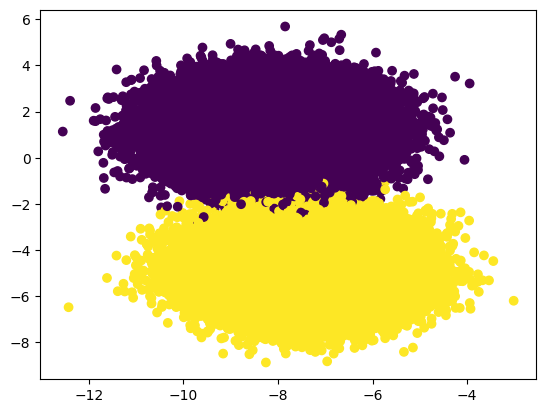

(100000, 7)
(100000,)


In [ ]:
sample_size= 100000
x, y = make_blobs(n_samples=sample_size, centers=2, n_features=7)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
print(x.shape)
print(y.shape)


In [ ]:
sampled_df= df.sample(n=sample_size, random_state=42, ignore_index=True)
x = sampled_df.drop(['fraud'], axis=1)
y =sampled_df['fraud']

sampled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
1,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
2,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
3,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
4,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99995,5.196402,1.306204,1.133054,1.0,0.0,0.0,1.0,0.0
99996,56.279883,0.152974,0.277104,1.0,0.0,0.0,0.0,0.0
99997,28.424613,0.466520,1.577858,1.0,1.0,0.0,1.0,0.0
99998,26.574444,2.679191,1.471028,1.0,0.0,0.0,1.0,0.0


 Y normalizamos nuestras características para mejorar el rendimiento de k-means.

In [ ]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x )

**Entrenamiento del modelo KMeans:**

Utilizamos el algoritmo KMeans para agrupar las transacciones en dos clusters basados en las características seleccionadas.
Agrupamos las clases a los datos normalizados y ajustamos el modelo.


In [ ]:
modelo_kmeans = KMeans(init='k-means++', n_clusters=2, random_state=42)
modelo_kmeans=modelo_kmeans.fit(scaled_x)

y_pred=modelo_kmeans.fit_predict(scaled_x)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
valores_pred = pd.Series(y_pred)
valores_pred.value_counts()

1    88101
0    11899
dtype: int64

In [ ]:
sampled_df['fraud'].value_counts()

0.0    91297
1.0     8703
Name: fraud, dtype: int64

In [ ]:
df_1 = sampled_df.copy()
df_1['y_pred'] = y_pred
df_1['y_pred'] = df_1['y_pred']

df_1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,y_pred
0,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0,0
1,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0,0
2,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0,1
3,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0,1
4,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
99995,5.196402,1.306204,1.133054,1.0,0.0,0.0,1.0,0.0,1
99996,56.279883,0.152974,0.277104,1.0,0.0,0.0,0.0,0.0,1
99997,28.424613,0.466520,1.577858,1.0,1.0,0.0,1.0,0.0,1
99998,26.574444,2.679191,1.471028,1.0,0.0,0.0,1.0,0.0,1


In [ ]:
df_1['fraud'].value_counts()
df_1['y_pred'].value_counts()
# create cross_tab to compare actual with predicted labels
cross_tab = pd.crosstab(df_1['fraud'], df_1['y_pred'], margins=False)
cross_tab


y_pred,0,1
fraud,,
0.0,10866,80431
1.0,1033,7670


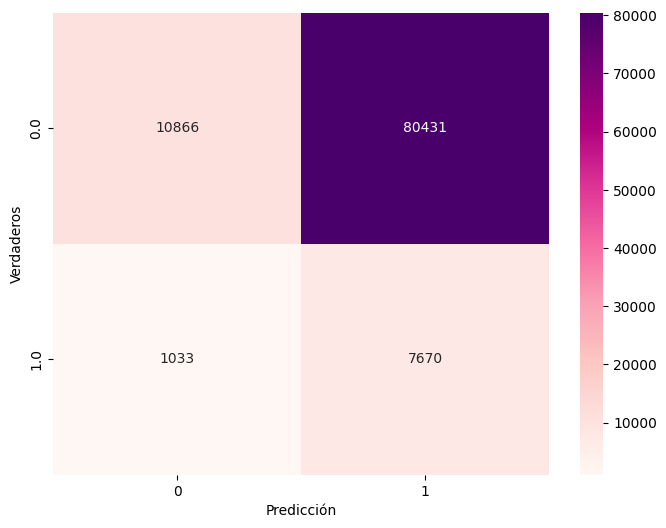

In [ ]:
fig = plt.figure(figsize=(8, 6))

fig = sns.heatmap(cross_tab,cmap="RdPu", annot=True, fmt='.0f')

fig.set_xlabel('Predicción')
fig.set_ylabel('Verdaderos')
plt.show()

Clase 0 (fraude) y Grupo 0 (Etiquetas previstas):
De las  91297 muestras de la clase 0, 10866 estan agrupadas correctamente en el Grupo 0.
Sin embargo, 80431  muestras de la clase 0 están clasificadas erróneamente en el Grupo 1.

Clase 1 (Objetivos) y Grupo 1 (Predicciónes):
De las 8.703 muestras de la clase 1, sólo 7670 están agrupadas correctamente en el Grupo 1.
Sin embargo, 1033 muestras de la clase 1 están clasificadas erróneamente en el Grupo 0.

**Validación del modelo:**

Para validar nuestro modelo, aplicamos el indice de Rand ajustado o el índice de Jaccard ajustado. Estas métricas comparan las etiquetas verdaderas con las asignaciones de cluster hechas por KMeans y proporcionan una medida de que tan similares son.

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_rand_score
import numpy as np

# Calcular el índice de Rand ajustado
ari = adjusted_rand_score(y, y_pred)
print("Índice de Rand ajustado:", ari)

Índice de Rand ajustado: -0.00021647119735603286
Índice de Jaccard ajustado: -0.00021647119735603286


Esta métrica devuelve un valor entre -1 y 1, donde 1 indica una perfecta concordancia entre las asignaciones de cluster y las etiquetas verdaderas, 0 indica una concordancia aleatoria y -1 indica una discordancia completa. Nuestros indice nos dieron resultados negativos, por lo que existe evidencia de discordancia en clustering.

Si bien KMeans no es el algoritmo más adecuado para la detección de fraudes en datos etiquetados, por ello decidimos combinar el modelo kmeans con regresión logistica para obtener mejores resultados.

###**CLUSTERING CON KMEANS + REGRESIÓN LOGISTICA**

En el siguiente código usamos 2 clusters y agregamos etiquetas a nuestro dataset.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

modelo_kmeans = KMeans(init='k-means++', n_clusters=2, random_state=42)
modelo_kmeans=modelo_kmeans.fit(scaled_x)

cluster_labels = modelo_kmeans.fit_predict(scaled_x)

X_clustered = np.column_stack((scaled_x, cluster_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dividimos los datos en conjuntos de entrenamiento y prueba (40% y 60% respectivamente).

Aplicamos Regresión Logística al modelo de detección de fraude y evaluamos el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.4, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9583


Nuestro modelo es 95.83% efectivo para identificar transacciones fraudulentas correctamente en comparación con todas las transacciones que ha clasificado.

#***ALGORITMOS SUPERVISADOS***

###**Support Vector Machine o SVM**

*Analista: Mi-Lai Yamamoto Joo*

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from sklearn import preprocessing, model_selection, neighbors
from sklearn.model_selection import train_test_split

In [ ]:
data='card_transdata.csv'
df=pd.read_csv(data)

Uno de los principales riesgos de las entidades son los fraudes en las transacciones de trajtas de crédito, en esta ocasión usaremos ML usando el modelo SVM para clasificar las transacciones en dos clases.
En un principio planeamos usar todo el dataset pero nos dimos cuenta que la ejecución del código es muy tardado, por lo que seleccionamos una muestra aleatoria de 100,000 datos.



In [ ]:
sample_size=100000
sampled_df= df.sample(n=sample_size, random_state=42, ignore_index=True)
x = sampled_df.drop(['fraud'], axis=1)
y =sampled_df['fraud']

Ahora dividimos los datos en conjuntos de entrenamiento y prueba. Sea 40% para datos de prueba y 60% de entrenamiento.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [ ]:
SD = StandardScaler()
x_train = SD.fit_transform(x_train)
x_test = SD.transform(x_test)
y_train_1d = np.ravel(y_train)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train_1d)

y_pred = svm_model.predict(x_test)

Evaluamos el modelo

In [ ]:
#Evaluar el modelo
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy *100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Nuestro modelo SVM nos data una precision de 96.325% que explica la clasificación binaria de las transacciones bancarias.

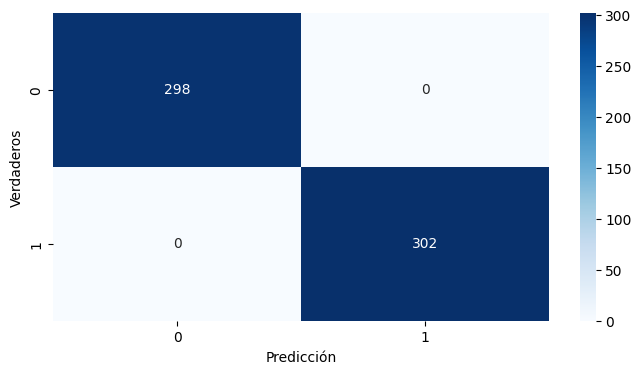

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 4))
sns.heatmap(cm, annot = True, fmt="d",cmap = "RdPu")
plt.xlabel("Predicción");
plt.ylabel("Verdaderos");

In [ ]:
sampled_df['fraud'].value_counts()

De la matriz de confusión observamos que de 91297 transacciones legales   36382 son clasifcadas correctamente, mientras que 232 son clasificadas erroneamente.

De las 8.703 muestras que son fraude , sólo 2148 están agrupadas correctamente en el Grupo 1.
Sin embargo, 1238 muestras de la clase 1 están clasificadas erróneamente en el Grupo 0.



In [ ]:
print(confusion_matrix(y_test,y_pred))

Verificamos la precisión del modelo

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

Como observamos nuestro modelo se desempeña exelente, con un 96%

###**Arboles de decisión**

 Analista: Litzi Vianey Acosta Reyes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar los datos
data = 'card_transdata.csv'
df = pd.read_csv(data)

# Preparación de los datos
X = df.drop('fraud', axis=1)  # Características predictoras
y = df['fraud']  # Variable objetivo

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = tree_model.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision}")

# Otras métricas de evaluación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


###**MODELO  K-NEAREST NEIGHBORS (kNN)**

**Elaborado por:**

Tania Rosales Onofre

Joselyn Guerrero Cabrera

***Definición:***
El algoritmo de k vecinos más cercanos, también conocido como KNN o k-NN, es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual.

Si bien se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo de la suposición de que se pueden encontrar puntos similares cerca uno del otro.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data='card_transdata.csv'
df=pd.read_csv(data)
print(df.shape)

(1000000, 8)


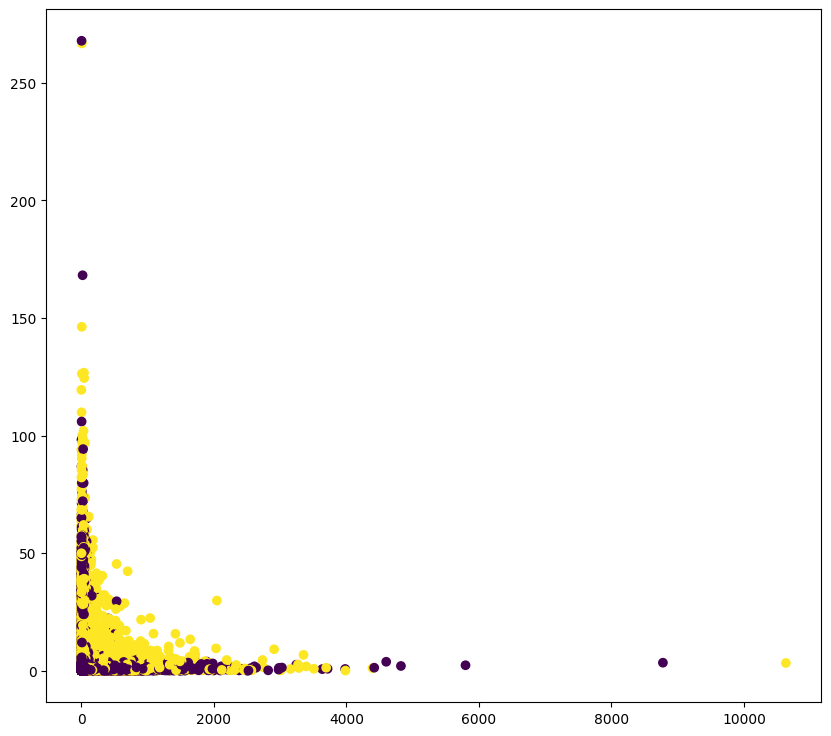

In [ ]:
fig = plt.figure(figsize=(10, 9))
x = df.drop(['fraud'], axis=1)
y =df['fraud']
plt.scatter(df['distance_from_home'],df['ratio_to_median_purchase_price'],c=y)
plt.show()

**Partición**

Separamos un 80% de los datos para el entrenamiento, 5% de validación y 15% para la prueba

In [ ]:
#Función para particionar nuestros datos
from sklearn.model_selection import train_test_split

def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

#Particionamos los datos
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.8,0.05,0.15)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.2
(800000, 7)
(50000, 7)
(150000, 7)


**Función Distancia**

Distancia euclidiana: Esta es la medida de distancia más utilizada y está limitada a vectores de valor real. Usando la fórmula a continuación, mide una línea recta entre el punto de consulta y el otro punto que se mide.

Distancia Manhattan: Esta es también otra métrica de distancia popular, que mide el valor absoluto entre dos puntos.

Distancia Minkowski: Esta medida de distancia es la forma generalizada de las métricas de distancia Euclidiana y Manhattan.



In [ ]:
# Distancia eucilidiana:
def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter])
    return distancias

# Distancia Manhattan
def distManhattan(muestra, dataset):
    distancias = np.zeros((dataset.shape[0], 1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.sum(np.abs(muestra - dataset[counter]))
    return distancias

# Distancia Minkowski
def distMinkowski(muestra, dataset):
    #p indica el orden de la distancia, tiene que ser entre 1 y 2 porque 1 es
    #para manhattan y 2 para la eucladiana
    p=1.5
    distancias = np.zeros((dataset.shape[0], 1))
    for counter in range(dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra - dataset[counter], ord=p)
    return distancias


**Accuaraccy**

Con la siguiente función obtendremos la presición del modelo.

In [ ]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

**Función knn**

Parámetros de la función:
*   muestra: La muestra para la que queremos predecir la etiqueta.
*   Elemento de lista
*   dataset: El conjunto de datos que contiene las muestras de entrenamiento.
*   labels:  Las etiquetas correspondientes a las muestras en el conjunto de datos.
*   k :   El número de vecinos más cercanos a considerar.
* distances: Distancias

In [ ]:
import numpy as np
def knn(muestra, dataset, labels, k, distances):

    # Ordena los índices de las distancias de menor a mayor y selecciona los k primeros
    sorted_indices = np.argsort(distances)[:k]

    # Obtiene las etiquetas correspondientes a los k vecinos más cercanos
    k_nearest_labels = labels[sorted_indices]

    # Calcula la etiqueta más común entre los k vecinos más cercanos
    prediction = np.bincount(k_nearest_labels).argmax()

    return prediction

**Evaluación de las funciones**

In [ ]:
#Definimos nuestra mestra
muestra = x_test.iloc[0]

#Obtenemos las distancias
distances_eu = distEuclidiana(muestra, x_train.values)
distances_man= distManhattan(muestra, x_train.values)
distances_min= distMinkowski(muestra, x_train.values)

In [ ]:
# Utiliza la función knn para predecir la etiqueta de la muestra de prueba
k=5
prediction_eu  = knn(muestra, x_train, y_train, k, distances_eu)
prediction_man = knn(muestra, x_train, y_train, k, distances_man)
prediction_min = knn(muestra, x_train, y_train, k, distances_min)

# La variable 'prediction' contendrá la etiqueta predicha para la muestra de prueba
print("Etiqueta predicha para la muestra de prueba:", prediction)

**KNN con función sklearn.neighbors**

En el contexto de nuestro trabajo, nos encontramos con dificultades y errores al intentar implementar soluciones personalizadas, lo que nos llevó a optar por las funciones predeterminadas disponibles en la bilbioteca Scikit-Learn para garantizar un desarrollo eficiente de nuestro código.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir el conjunto de datos en entrenamiento y prueba
#80% de los datos para entrenamiento
#20% de los datos para prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador KNN

knn_eu = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #con la distancia euclidiana
knn_man= KNeighborsClassifier(n_neighbors=5, metric='manhattan') #con la distancia Manhattan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada en el conjunto de entrenamiento
scores_eu  = cross_val_score(knn_eu, X_train, y_train, cv=kf)
scores_man = cross_val_score(knn_man, X_train, y_train, cv=kf)

# Imprimir el rendimiento del modelo en la validación cruzada
print(f"Precisión modelo con distancia euclidiana: {np.mean(scores_eu):.2f}")
print(f"Precisión modelo con distancia manhattan: {np.mean(scores_man):.2f}")


# Entrenar el modelo con todo el conjunto de entrenamiento y evaluar en el conjunto de prueba
#euclidiano
knn_eu.fit(X_train, y_train)
test_score = knn_eu.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_score:.2f}")
#Manhattan
knn_man.fit(X_train, y_train)
test_score = knn_man.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_score:.2f}")

Estos resultados indican que ambos modelos son bastante precisos en la predicción de las etiquetas de clase en el conjunto de prueba. Sin embargo, el modelo con distancia Manhattan parece ser ligeramente más preciso que el modelo con distancia euclidiana. Además, la precisión en el conjunto de prueba es consistente con las precisiones de los modelos individuales, lo que sugiere que los modelos generalizan bien a datos no vistos.

Por lo tanto, si continuamos trabajando con el ajuste de la distancia Manhattan, podemos concluir que el modelo es altamente preciso en la clasificación de las instancias en el conjunto de datos evaluado. Este alto nivel de precisión sugiere una buena separabilidad de clases y predicciones confiables por parte del modelo. Esto implica que las clases en el conjunto de datos están bien diferenciadas, lo que permite al modelo hacer predicciones precisas basadas en las características proporcionadas.

# **Árboles de Decisión**

Autoras:
Litzi Acosta,
Dafne Badillo

El siguiente modelo que analizaremos es de aprendizaje supervisado. Los pasos a realizar son los siguientes:

1. Divisón del conjunto de datos - Este es el primer paso ya que los arboles empiezan con los datos completos desde la raíz y en cada nodo interno se dividen los datos en subconjuntos más pequeños basados en una característica.
2. Selección de la mejor característica - Para este caso en específico decidimos utilizar la característica 'fraud' ya que esta indica en un valor númerico 0 (si no fue fraude) y 1 (si fue fraude). Considerando que esta es la mejor característica basa en una decisión booleana.
3. Entrenamiento y prueba - Se dividen los datos en dos categorías para que el modelo pueda tener mejores resultados.
4. Evaluación del modelo - Se utiliza la función accuracy_score de la biblioteca Scikit-learn.



In [ ]:
# Preparación de los datos
X = df.drop('ratio_to_median_purchase_price', axis=1)  # Características predictoras
y = df['fraud']  # Variable objetivo

Se utiliza la característica 'ratio_to_median_purchase_price' como variable x_train que funciona como la característica predictora. Y en y_train como la variable binaria que indique si cada transacción es fraudulenta o no.

In [ ]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se establece como random_state 42 ya que se ha elejido como un valor pre establecido.

In [ ]:
# Entrenamiento del modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

Después de ejecutar estas líneas de código, el modelo de árbol de decisión estará entrenado y listo para hacer predicciones sobre los datos.

In [ ]:
# Evaluación del modelo
y_pred = tree_model.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision}")

Para calcular la precisión del modelo decidimos utilizar la función accuracy_score, tomando como entrada las etiquetas verdaderas y las predicciones realizadas anteriormente. Un valor de precisión de 1.0, significa que todas las muestras en tu conjunto de datos de prueba fueron clasificadas correctamente por el modelo. Por lo que es un resultado muy deseable y sugiere que tu modelo es muy efectivo en hacer predicciones precisas sobre los datos de prueba.

###**REDES NEURONALES**

Autora: Dafne Linette Badillo Campuzano

En este ejemplo vamos a conectar una red neuronal: Una red neuronal se compone de varias capas neuronales conectadas que envían información hacia adelante. Para ello vamos a conectar dos neuronas en la capa 1, con una neurona en la capa 2.

Para los datos de la detección de fraude utilizaremos una red neuronal que esta compuesta de varias capas neuronales conetadas que envían información hacia adelante. Para ello, conectamos dos neuronas en la capa 1 con una neurona en la capa 2.

Pasos para implementar una red neuronal en nuestro dataset:
1. Preparar tus datos.
2. Inicializar pesos y sesgos con datos del dataset.
3. Entrenar la red neuronal.

In [ ]:
import pandas as pd
data='card_transdata.csv'
df=pd.read_csv(data)

Antes de iniciar la programación y entrenamiento de la red neuronal; desarrollamos un mapa de correlación utilizando un mapa de calor, esto con el proposito de explorar la relación entre las características en el data set.
Así será más fácil identificar las características mas correlacionadas y guiar la selección de características.

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Definir el tamaño del gráfico

# Utilizar sns.heatmap para crear el mapa de calor
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# 'annot=True' muestra los valores en cada celda, 'cmap' define el esquema de color, 'fmt' establece el formato de los valores

plt.title('Mapa de Calor de Correlación')  # Establecer el título del gráfico
plt.show()  # Mostrar el mapa de calor

De acuerdo a la matriz de correlación implementada anteriormente, se ha concluido en utilizar la característica **ratio_to_median_purchase_price** ya que, esta característica podría ayudar a identificar transacciones que tienen un valor inusualmente alto o bajo en comparación en el precio de compra medio. Transacciones que están significativamente por encima o por debajo de la media podrían ser sospechosas de fraude. En conjunto con la característica de **fraud** ya que presenta un valor de 0.46 lo que quiere decir que indica que hay una relación moderadamente positiva entre estas dos características en el conjunto de datos.


In [ ]:
# Seleccionar la característica "ratio_to_median_purchase_price"
X_selected = df[['ratio_to_median_purchase_price']]

# Convertir la columna 'Fraude' en la variable objetivo y
y = df['fraud']

In [ ]:
X_selected

In [ ]:
def calcularZ(w, x, b):
    # Asegurar que b tenga la misma forma que la matriz resultante de la multiplicación de w y x
    b_expanded = np.tile(b, (x.shape[1], 1)).T
    z = np.dot(w, x) + b_expanded
    return z

def activacion(z):
    y = 1 / (1 + np.exp(-z))
    return y

def capaNeuronal(w,x,b):
    z = calcularZ(w,x,b)
    y_pred = activacion(z)
    return y_pred

def inicializarCapa(numCaracteristicas, numNeuronas):
    w = np.random.rand(numCaracteristicas,numNeuronas)
    w_transpose = w.T
    b = np.random.rand(numNeuronas)
    return w_transpose,b

In [ ]:
# Supongamos que tienes tus datos de entrada X_train y y_train
# y que has seleccionado solo la característica "ratio_to_median_purchase_price"
X_train = X_selected

# Número de características después de la selección
numCaracteristicas = 1

# Número de neuronas en la primera capa oculta
numNeuronas1 = 4

# Número de neuronas en la segunda capa oculta
numNeuronas2 = 2

In [ ]:
# Inicializar los pesos y sesgos para la primera capa oculta
w1, b1 = inicializarCapa(numCaracteristicas, numNeuronas1)

# Inicializar los pesos y sesgos para la segunda capa oculta
w2, b2 = inicializarCapa(numNeuronas1, numNeuronas2)


In [ ]:
# Salida de la primera capa oculta
y1 = capaNeuronal(w1, X_selected.values.T, b1)

# Salida de la segunda capa oculta y predicción final
y_pred = capaNeuronal(w2, y1, b2)

# Imprimir la salida final
print(y_pred)

La salida final **y_pred** representan las predicciones realizadas por la Red Neuronal para cada ejemplo del data set de entrada. Estos valores representan la probabilidad estimada de que cada transacción sea fraudulenta.
os valores de **y_pred** están en el rango [0, 1]. Un valor cercano a 1 indica una alta probabilidad de fraude, mientras que un valor cercano a 0 indica una baja probabilidad de fraude.

El siguiente paso para continuar es entrenar la Red Nueronal, ajustando pesos y sesgos mediante la retropropagación y así finalmente evaluar el rendimiento del modelo.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Definir y configurar la red neuronal
red_neuronal = MLPClassifier(hidden_layer_sizes=(4, 2), max_iter=20000, activation='logistic', tol=1e-7)

# Entrenar la red neuronal
red_neuronal.fit(X_train, y_train)

# Evaluar el rendimiento del modelo
precision = red_neuronal.score(X_test, y_test)
print("Precisión del modelo:", precision)



Una precisión del modelo del 93.91% es un resultado bastante sólido. Esto significa que la red neuronal es capaz de predecir correctamente el 93.91% de las transacciones como fraudes o no fraudes en tu conjunto de datos de prueba.

La función MLPClassifier de Scikit-learn utiliza SGD por defecto como el algoritmo de optimización para entrenar la red neuronal.
En este contexto del modelo de la Red Neuronal para la detección de fraudes en tarjetas de crédito, el SGD se encarga de ajustar los pesos y sesgos de la red neuronal durante el proceso de entrenamiento para minimizar la función de pérdida.

En conclusión, el resultado de la precisión del modelo del 93.91% indica que la red neuronal entrenada utilizando el SGD, es capaz de realizar predicciones precisas en la detección de fraudes en tarjetas de crédito en el conjunto de datos de prueba. Esto sugiere que el SGD fue efectivo en ajustar los parámetros del modelo para lograr un rendimiento sólido en la tarea de clasificación.

###**Conclusión**

En conclusión nuestros algoritmos quedaron de la siguiente forma de acuerdo a su precisión:

1. Arboles de decisiones 99% - 100%
2. Support Vector Machine 96.325%
3. Regresión Logistica 95.83%
4. Redes Neuronales 93.91%
5. KNN
6. Kmeans- No fue un buen modelo para detectar fraudes bancarios.

Finalmente, nos dimos cuenta que para modelar fraudes en trasacciones de tarjetas de crédito los algoritmos supervisados son mejores que los algoritmos no supervisados.
Entender cada uno de los codigos y sus diferencias fue un reto, a pesar de que nos faltaron algoritmos por probar como Random Forest, podemos decir que el algoritmo de arboles de decisiones se ajusta bien a nuestros datos.

Después de haber llevado a cabo este proyecto, nos encontramos con grandes retos como llevar a cabo algoritmos que nunca habíamos tenido experiencia. Pero esta clase de retos, nos ayudo a retarnos como analistas de datos, ayudandonos a adquirir mayor experiencia y a ampliar nuestro conocimiento. Y a enfrentar problemáticas que con los conocimientos adquiridos podemos aplicar en nuestros respectivos campos y seguir aprendiendo y enfrentando nuevos retos y experiencias.